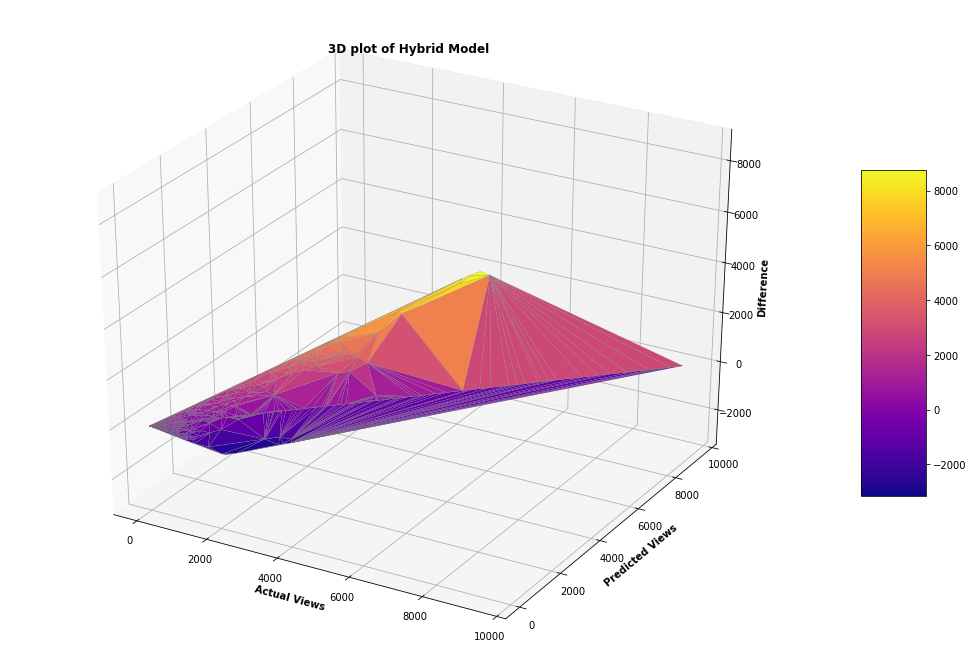

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import numpy as np
from pandas.plotting import parallel_coordinates


points = pd.read_csv('hybrid_toplot.csv')

fig = plt.figure(figsize = (18, 12))
ax = fig.add_subplot(111, projection='3d')

X = points['x'].values
Y = points['y'].values
Z = points['z'].values
A = points['a'].values

diff = np.subtract(A, X)

# Creating color map
my_cmap = plt.get_cmap('plasma')
   
# Creating plot
trisurf = ax.plot_trisurf(A, X, diff,
                         cmap = my_cmap,
                         linewidth = 0.2,
                         antialiased = True,
                          edgecolor = 'grey') 
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)
ax.set_title('3D plot of Hybrid Model', fontweight ='bold')

# Adding labels
ax.set_xlabel('Actual Views', fontweight ='bold')
ax.set_ylabel('Predicted Views', fontweight ='bold')
ax.set_zlabel('Difference', fontweight ='bold')

plt.show()

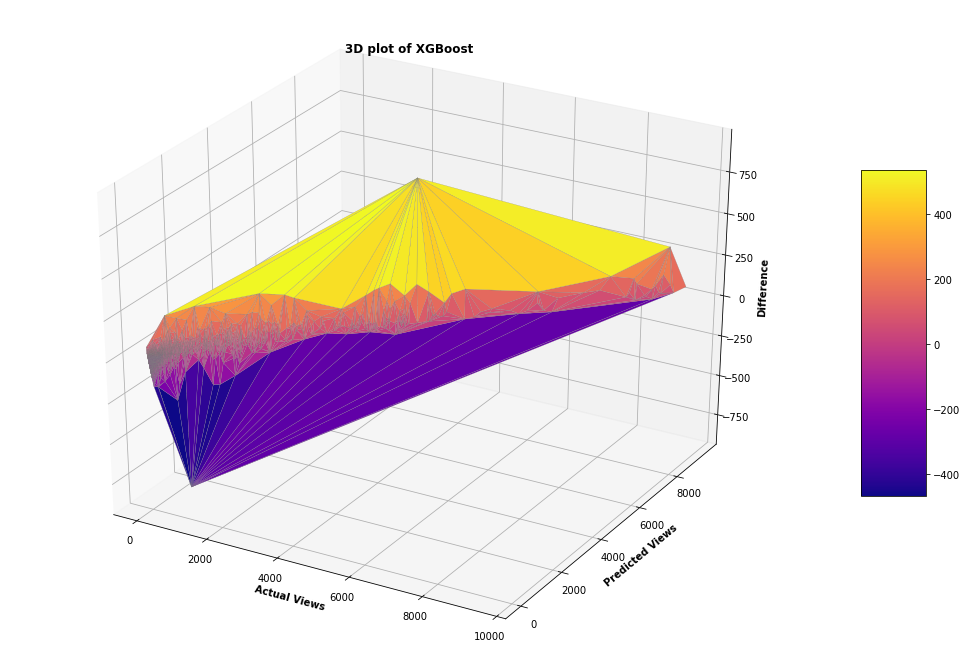

In [ ]:

fig = plt.figure(figsize = (18, 12))
ax = fig.add_subplot(111, projection='3d')

diff = np.subtract(A, Y)

# Creating color map
my_cmap = plt.get_cmap('plasma')

# Creating plot
trisurf = ax.plot_trisurf(A, Y, diff,
                         cmap = my_cmap,
                         linewidth = 0.2,
                         antialiased = True,
                          edgecolor = 'grey') 
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)
ax.set_title('3D plot of XGBoost', fontweight ='bold')
# Adding labels
ax.set_xlabel('Actual Views', fontweight ='bold')
ax.set_ylabel('Predicted Views', fontweight ='bold')
ax.set_zlabel('Difference', fontweight ='bold')

plt.show()

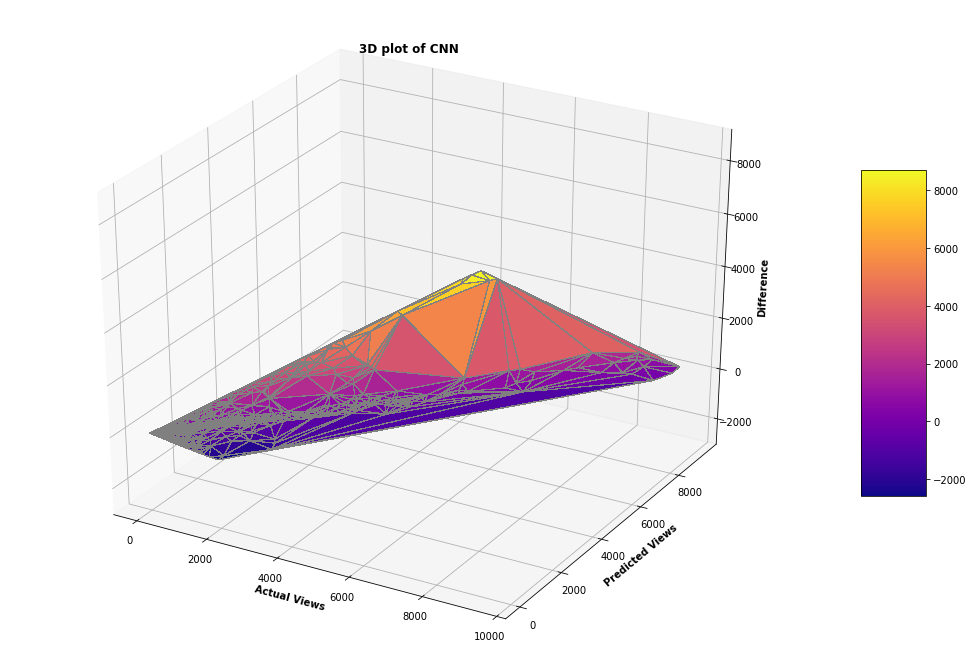

"\nfrom pandas import plotting\ndata = pandas.read_csv('train_meta_df.csv')\nplotting.scatter_matrix(data[['duration', 'views', 'n_likes']]) \n"

In [ ]:
import math 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 

fig = plt.figure(figsize = (18, 12))
ax = fig.add_subplot(111, projection='3d')

diff = np.subtract(A, Z)

# Creating color map
my_cmap = plt.get_cmap('plasma')

# Creating plot
trisurf = ax.plot_trisurf(A, Z, diff,
                         cmap = my_cmap,
                         linewidth = 0.2,
                         antialiased = False,
                          edgecolor = 'grey') 
fig.colorbar(trisurf, ax = ax, shrink = 0.5, aspect = 5)
ax.set_title('3D plot of CNN', fontweight ='bold')
# Adding labels
ax.set_xlabel('Actual Views', fontweight ='bold')
ax.set_ylabel('Predicted Views', fontweight ='bold')
ax.set_zlabel('Difference', fontweight ='bold')

plt.show()

'''
from pandas import plotting
data = pandas.read_csv('train_meta_df.csv')
plotting.scatter_matrix(data[['duration', 'views', 'n_likes']]) 
'''


In [ ]:
import statsmodels.api as sm
import scipy.stats
#For each column, calculate R squared, RMSE, MAE, Corr

df = pd.read_csv('Plot_Data.csv')

def f_test(group1, group2):
    f = np.var(group1, ddof=1)/np.var(group2, ddof=1)
    nun = group1.size-1
    dun = group2.size-1
    p_value = 1-scipy.stats.f.cdf(f, nun, dun)
    print("F Test: ", f)
    print("P Value: ", p_value)
    return f, p_value

def r_square(a, b):
  return r2_score(a,b)

def get_stats(a, b):
  R_square = r_square(a, b) 
  print('R Squared: ', R_square)
  rmse_val = np.sqrt(((a - b) ** 2).mean())
  print('Root Mean Squared: ', rmse_val)
  print("Variance: ", np.var(a), np.var(b))
  f_test(a, b)

get_stats(A, Y)


R Squared:  0.9974253372391435
Root Mean Squared:  61.495875200428415
Variance:  1468830.296597222 1402515.0550345555
F Test:  1.047283087140218
P Value:  0.10296314815962082


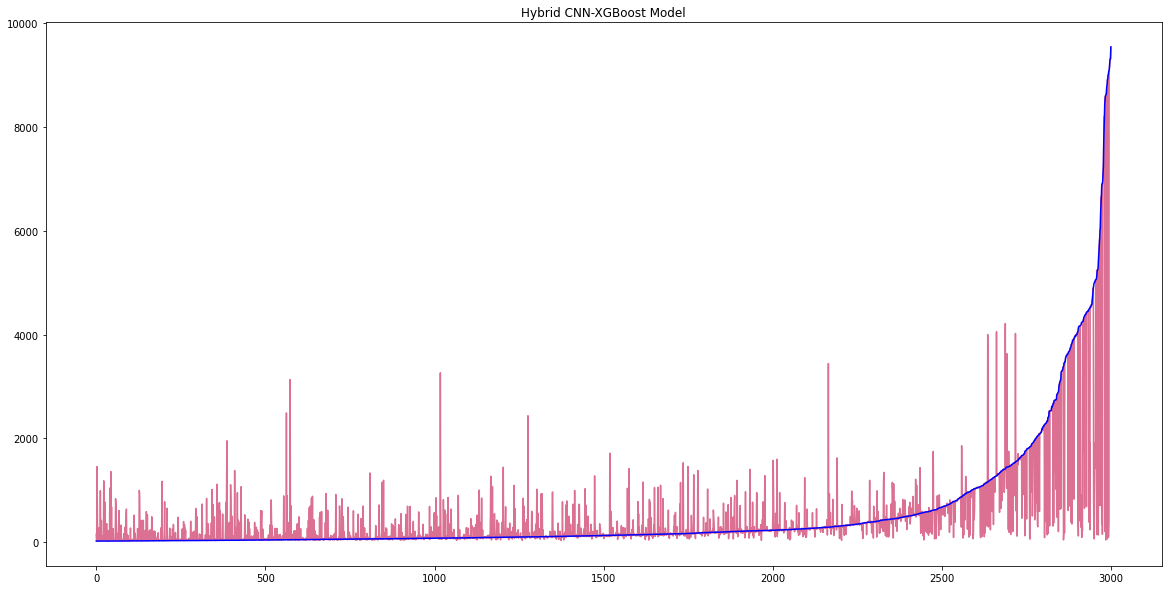

In [ ]:
x1 = df['Hybrid']
x2 = df['XGBoost']
x3 = df['CNN']
y = df['Actual']

plt.figure(figsize = (20, 10))
plt.plot(x1, color = 'palevioletred', label = 'Hybrid CNN-XGBoost Model')
plt.plot(y, color = 'blue')
plt.title('Hybrid CNN-XGBoost Model')
plt.show()

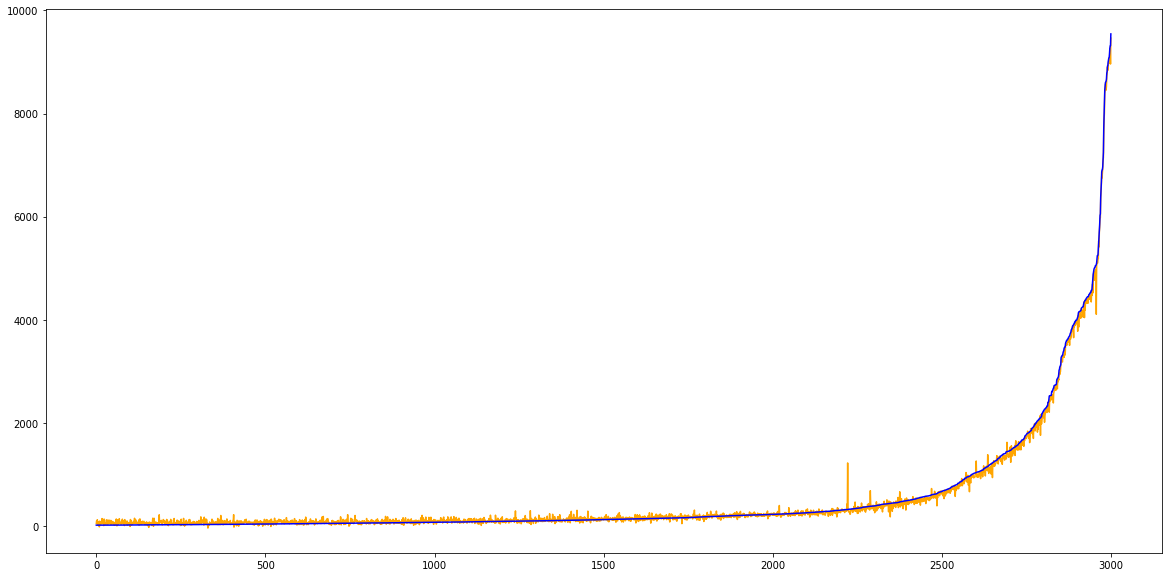

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(x2, color = 'orange') 
plt.plot(y, color = 'blue')
plt.show()

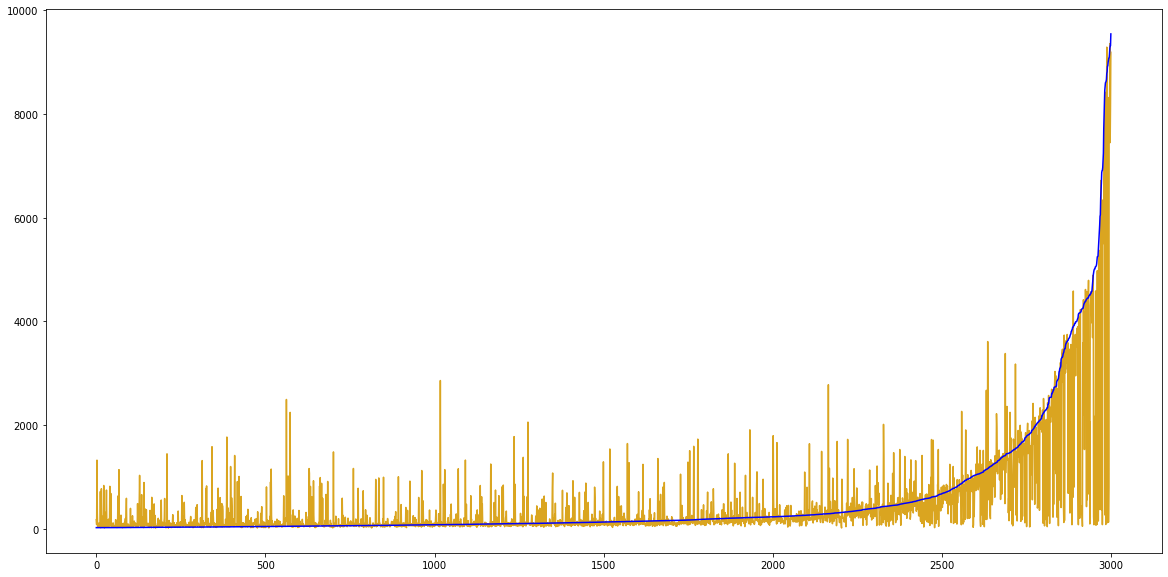

In [ ]:
plt.figure(figsize = (20, 10))
plt.plot(x3, color='goldenrod')
plt.plot(y, color = 'blue')
plt.show()

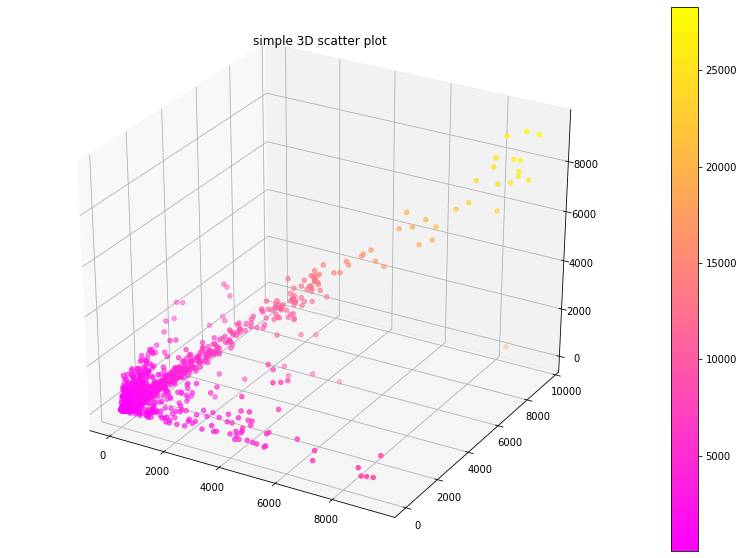

In [ ]:
# Creating figure
fig = plt.figure(figsize = (14, 10))
ax = plt.axes(projection ="3d")
color_map = plt.get_cmap('spring')

# Creating plot
scatter_plot = ax.scatter3D(Y, X, Z, c=(A+X+Z), cmap = color_map)
plt.title("simple 3D scatter plot")
plt.colorbar(scatter_plot)

# show plot
plt.show()


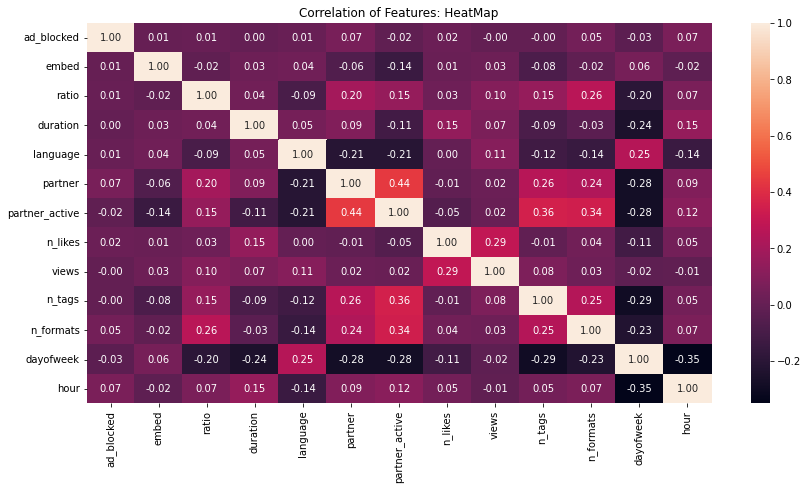

In [ ]:
dt_hm = pd.read_csv('train_meta_df.csv')
dt_hm.drop('comp_id',axis='columns',inplace=True)
# Width and height of the figure
plt.figure(figsize=(14,7))
# Title
plt.title('Correlation of Features: HeatMap', )
sns.heatmap(dt_hm.corr(), annot=True, cmap ='rocket', fmt='.2f')
plt.show()


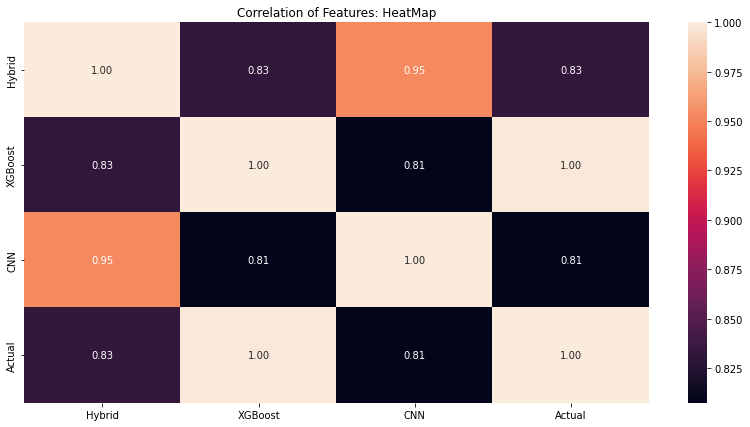

In [ ]:
dt_hm = pandas.read_csv('Plot_Data.csv')
# Width and height of the figure
plt.figure(figsize=(14,7))
# Title
plt.title('Correlation of : HeatMap', )
sns.heatmap(dt_hm.corr(), annot=True, cmap ='rocket', fmt='.2f')
plt.show()

XGB Diff: [ 16 139  42 ... -68 -73  24]
Hybrid Average:  24
XGB Average:  0
CNN Average:  74.48064197126


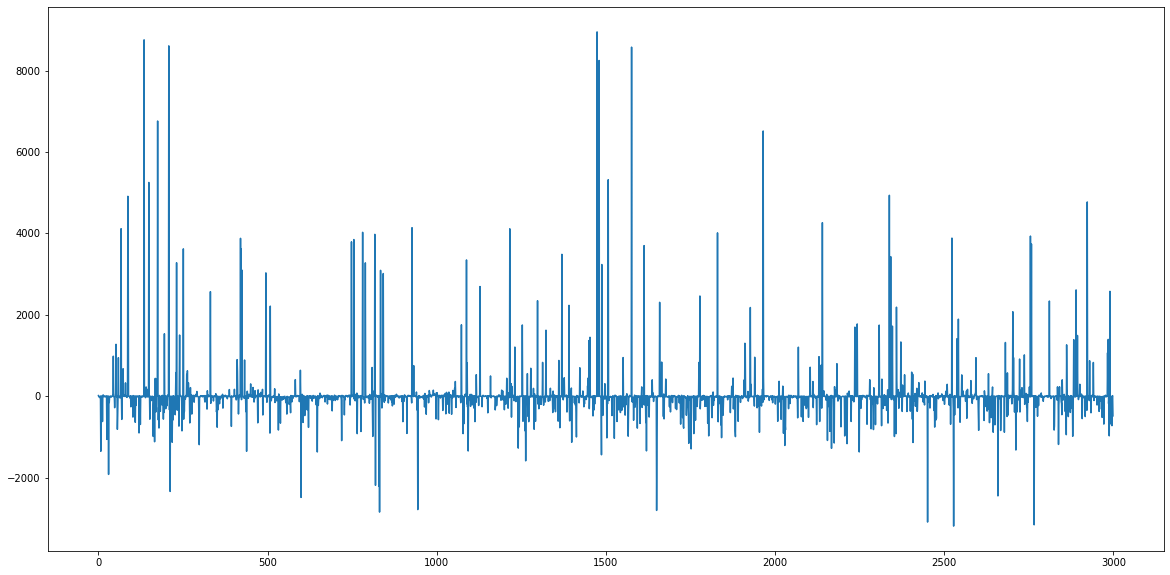

In [ ]:
from statistics import mean

hybrid_diff = np.subtract(A, X)
xgb_diff = np.subtract(A, Y)
cnn_diff = np.subtract (A, Z)

print("XGB Diff:", xgb_diff)

hybrid_avg = mean(hybrid_diff)
xgb_avg = mean(xgb_diff)
cnn_avg = mean(cnn_diff)

print("Hybrid Average: ", hybrid_avg)
print("XGB Average: ", xgb_avg)
print("CNN Average: ", cnn_avg)

plt.figure(figsize = (20, 10))
plt.plot(hybrid_diff)
plt.show()

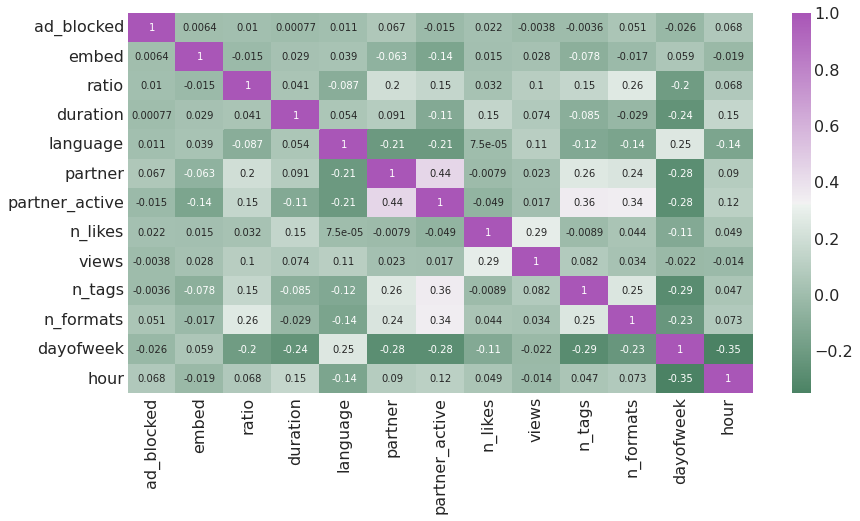

In [ ]:
def titanic_corr(data):
  correlation = data.corr()
  plt.figure(figsize=(14,7))
  sns.heatmap(correlation, annot=True, cbar=True, cmap = sns.diverging_palette(145, 300, s=60, as_cmap=True)) 
titanic_corr(dt_hm)

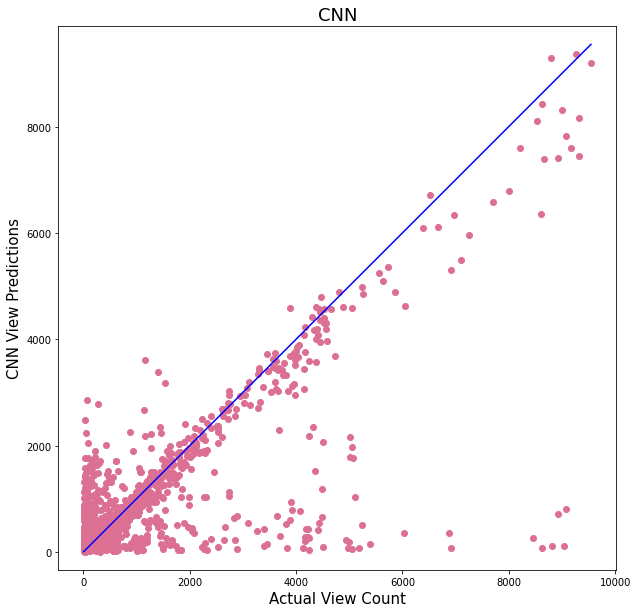

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(A, Z, c='palevioletred')

p1 = max(max(Z), max(A))
p2 = min(min(Z), min(A))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.title('CNN', fontsize=18)
plt.xlabel('Actual View Count', fontsize=15)
plt.ylabel('CNN View Predictions', fontsize=15)
plt.axis('equal')
plt.show()

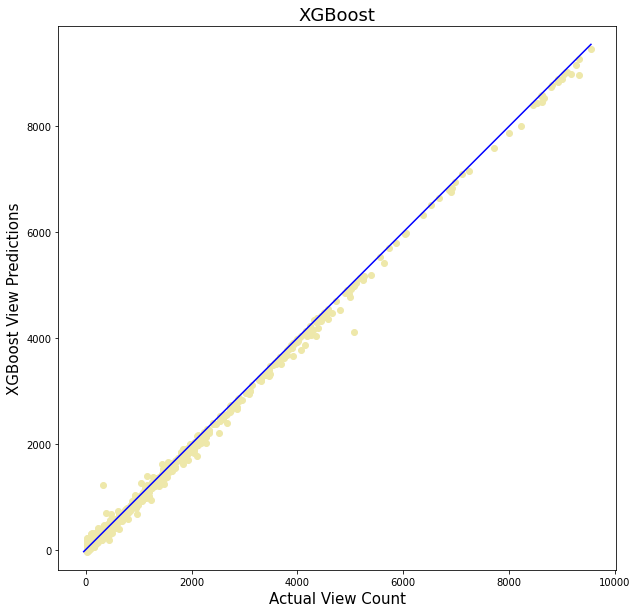

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(A, Y, c='palegoldenrod')

p1 = max(max(Y), max(A))
p2 = min(min(Y), min(A))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual View Count', fontsize=15)
plt.ylabel('XGBoost View Predictions', fontsize=15)
plt.title('XGBoost', fontsize=18)
plt.axis('equal')
plt.show()

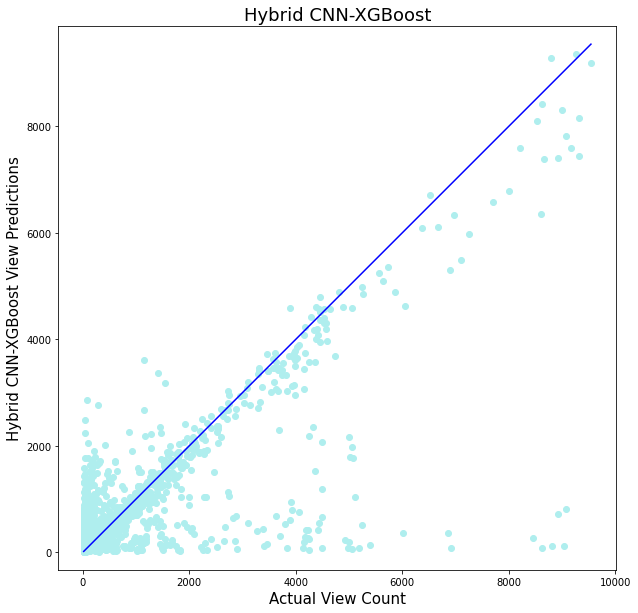

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(A, Z, c='paleturquoise')

p1 = max(max(X), max(A))
p2 = min(min(X), min(A))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('Actual View Count', fontsize=15)
plt.ylabel('Hybrid CNN-XGBoost View Predictions', fontsize=15)
plt.title('Hybrid CNN-XGBoost', fontsize=18)
plt.axis('equal')
plt.show()

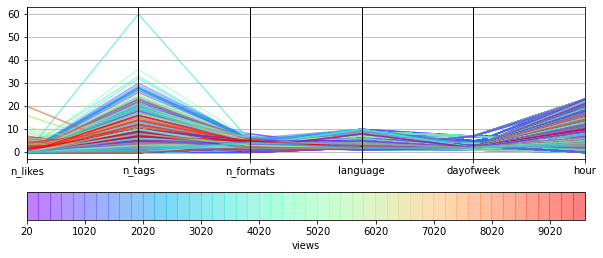

In [ ]:

penguins = pd.read_csv('train_meta_df.csv')

fig, ax = plt.subplots(figsize=(10, 4))
cmap = plt.get_cmap('rainbow')
bounds = np.arange(penguins['views'].min(), penguins['views'].max() + 200, 200)
norm = mpl.colors.BoundaryNorm(bounds, 256)

penguins = penguins.dropna(subset=['views'])
parallel_coordinates(penguins[['n_likes', 'n_tags', 'n_formats', 'language','dayofweek','hour', 'views']],
                     'views', colormap=cmap, alpha=0.5, ax=ax)
ax.legend_.remove()
plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
             ax=ax, orientation='horizontal', label='views', alpha=0.5)
plt.show()

In [ ]:
import plotly.graph_objects as go

import pandas as pd

df = pd.read_csv("train_meta_df.csv")

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = df['views'],
                   colorscale = 'sunset',
                   showscale = True,
                   cmin = 10000,
                   cmax = 0),
        dimensions = list([
            dict(range = [0,20500],
                 label = "Duration", values = df['duration']),
            dict(range = [0,20],
                 label = 'Number of Likes', values = df['n_likes']),
            dict(tickvals = [1,2,3,4,5,6,7,8,9,10],
                 label = 'Language', values = df['language']),
            dict(range = [0, 3.5],
                 label = 'Ratio', values = df['ratio']),
            dict(range = [-13.0,15.0],
                 visible = True,
                 label = 'Desc_16', values = df['desc_16']),
            dict(range = [-6.5, 14.5],
                 label = 'Desc_24', values = df['desc_24']),
            dict(range = [-9.0, 7.0],
                 label = 'Desc_46', values = df['desc_24']),
            dict(range = [-4.7, 4.5],
                 label = 'Title_8', values = df['title_8']),
            dict(range = [-6.3, 6.7],
                 label = 'Title_27', values = df['title_27']),
            dict(range = [-900.0, 22.6],
                 label = 'Feature 94', values = df['feature_94'])
            ])
    )
)
fig.show()

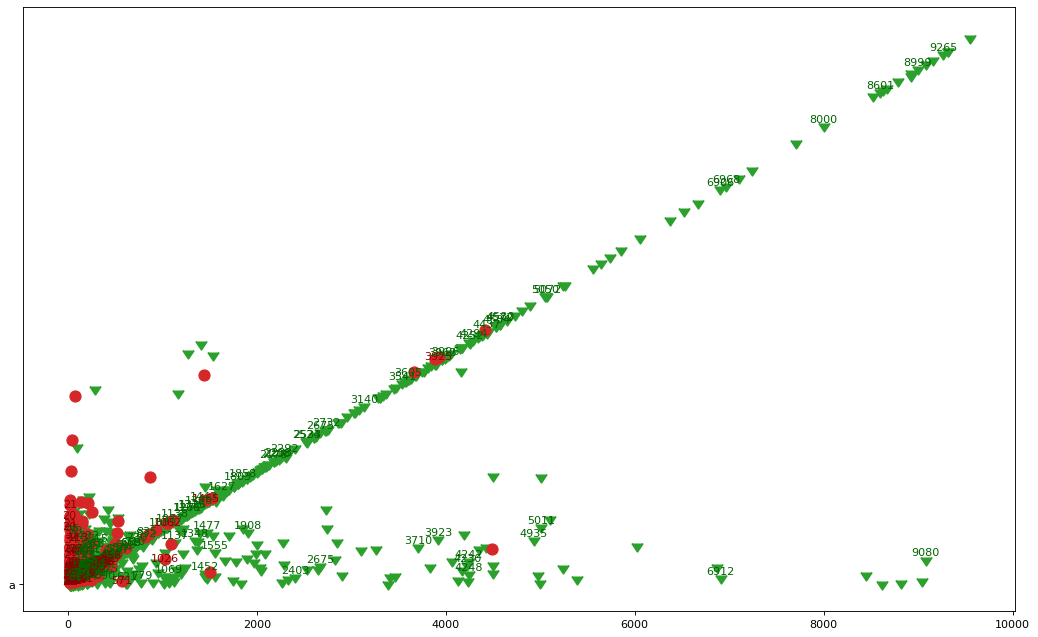

In [ ]:
import matplotlib as mpl

# Get the Peaks and Troughs
doublediff = np.diff(np.sign(np.diff(A)))
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*A)))
trough_locations = np.where(doublediff2 == -2)[0] + 1

# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('a', 'x', data=[points], marker=mpl.markers.CARETUPBASE, color='tab:blue', label='Air Traffic')
plt.scatter(A[peak_locations], X[peak_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(A[trough_locations], X[trough_locations], color='tab:red', s=100, label='Troughs')

# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(A[p], X[p]+15, A[p], horizontalalignment='center', color='darkgreen')
    plt.text(A[t], X[t]-35, A[t], horizontalalignment='center', color='darkred')


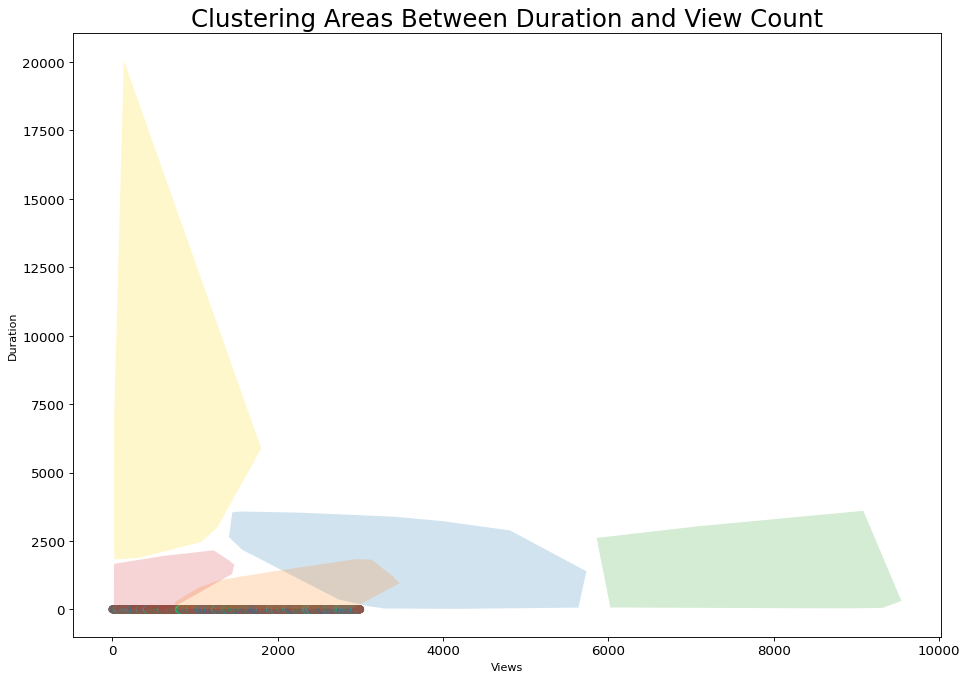

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

# Import Data
df = pd.read_csv('train_meta_df.csv')

# Agglomerative Clustering
cluster = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')  
cluster.fit_predict(df[['views', 'duration', 'n_likes', 'n_tags']])  

# Plot
plt.figure(figsize=(14, 10), dpi= 80)  
plt.scatter(df.iloc[:,0], df.iloc[:,1], c=cluster.labels_, cmap='tab10')  

# Encircle
def encircle(x,y, ax=None, **kw):
    if not ax: ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:], **kw)
    ax.add_patch(poly)

# Draw polygon surrounding vertices    
encircle(df.loc[cluster.labels_ == 0, 'views'], df.loc[cluster.labels_ == 0, 'duration'], ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1, 'views'], df.loc[cluster.labels_ == 1, 'duration'], ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2, 'views'], df.loc[cluster.labels_ == 2, 'duration'], ec="k", fc="tab:red", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 3, 'views'], df.loc[cluster.labels_ == 3, 'duration'], ec="k", fc="tab:green", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 4, 'views'], df.loc[cluster.labels_ == 4, 'duration'], ec="k", fc="tab:orange", alpha=0.2, linewidth=0)


# Decorations
plt.xlabel('Views'); plt.xticks(fontsize=12)
plt.ylabel('Duration'); plt.yticks(fontsize=12)
plt.title('Clustering Areas Between Duration and View Count', fontsize=22)
plt.show()

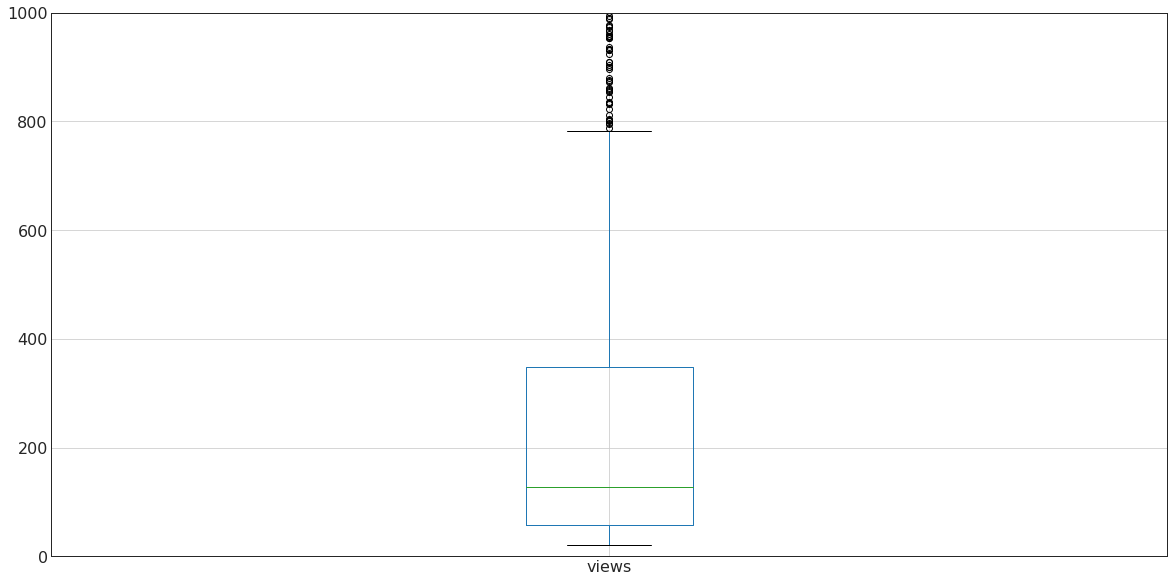

In [ ]:
df = pd.read_csv('train_meta_df.csv', dtype=float)
df.drop('comp_id',axis='columns',inplace=True)
fig = plt.figure(figsize =(20, 10))
plt.ylim(0, 1000) 
boxplot = df.boxplot('views')
